In [5]:
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.multiclass import OneVsRestClassifier
#Evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, fbeta_score
import time

In [6]:
dataFrame_7 = pd.read_csv("data/rawScaled7.csv")
df_7 = dataFrame_7
# dataFrame_all = pd.read_csv("data/rawScaledAll.csv")
# df_all = dataFrame_all

In [13]:
df_7.head()

,text,retweet_count,is_quote_status,user_name,followers_count,friends_count,listed_count,favourites_count,statuses_count,tweet_age,sentiment,text_length,hashtags_count,usermention_count,urls_count,emojis_count,activated_duration,dow,is_weekend
0,touched carters story able pls help w chance d...,1381,0,katyperry,109577041.0,216.0,141387.0,6214,9220,7,0.50,77,0,0,1,1,9,1,0
1,rt thwofd cynthia germanotta momgerm explains ...,550,0,ladygaga,78902805.0,127004.0,224828.0,1915,8764,102,0.00,95,1,4,0,0,10,4,0
2,littlebigshots thursday theres better way cele...,347,0,TheEllenShow,78052818.0,35730.0,107416.0,954,16970,7,0.25,81,1,0,1,0,9,1,0
3,tuesday mood kaceymusgraves,87,0,TheEllenShow,78052818.0,35730.0,107416.0,954,16970,8,0.00,28,0,1,1,0,9,1,0
4,someone watching show gonna way riches,101,0,TheEllenShow,78052818.0,35730.0,107416.0,954,16970,9,0.00,39,0,0,1,0,9,1,0


In [7]:
classifiers = [
    ('LinearSVC', OneVsRestClassifier(LinearSVC(random_state=23))),
    ('Linear Regression', LinearRegression()),
    ('Ridge CV', RidgeCV()),            
]

In [8]:
#Add the features of the dataframe that you want to transform and/or combine
mapper = DataFrameMapper([
     ('text', TfidfVectorizer()),     
     ('is_quote_status', None),
     ('user_name', TfidfVectorizer()),
     ('followers_count', None),
     ('friends_count', None),
     ('listed_count', None),
     ('favourites_count', None),
     ('statuses_count', None),
     ('tweet_age', None),
     ('sentiment', None),
     ('text_length', None),
     ('hashtags_count', None),
     ('usermention_count', None),
     ('urls_count', None),
     ('emojis_count', None),
     ('activated_duration', None),
     ('dow', None),
     ('is_weekend', None),
 ])
 
"""
Use the fit_transform method to transform the old dataframe into a new one
that can be fed to the machine learning algorithm.
"""
 
#sample Usage
features = mapper.fit_transform(df_7)
target = df_7['retweet_count']
 
# Split the data between train and test
x, x_test, y, y_test = train_test_split(features, target, test_size=0.2, train_size=0.8, random_state = 0)

In [20]:
len(x)

7078

In [10]:
cls_dict = {}
cls_dict_pred = {}
for clf_name, classifier in classifiers:
    y_pred = classifier.fit(x, y)
    cls_dict.update({clf_name: y_pred})
    predictions = y_pred.predict(x_test)
    cls_dict_pred.update({clf_name: predictions})

In [11]:
cls_dict['LinearSVC'].score(x,y)

0.0008476970895733258

In [22]:
cls_dict['LinearSVC'].score(x_test, y_test)

0.0011299435028248588

In [23]:
cls_dict['Linear Regression'].score(x_test, y_test)

-15344777.43342054

In [24]:
cls_dict['Ridge CV'].score(x_test, y_test)

-5.771381228278708

In [17]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, fbeta_score
import time
import seaborn as sns
import numpy as np

In [19]:
#linear Regression
print("MAE:", metrics.mean_absolute_error(y_test, cls_dict_pred['Linear Regression']))
print("MSE:", metrics.mean_squared_error(y_test, cls_dict_pred['Linear Regression']))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, cls_dict_pred['Linear Regression'])))

#print confidence intervals for the model coefficients

MAE: 6272128.303607552
MSE: 254924875302076.22
RMSE: 15966367.003863974


In [20]:
#linear SVC
print("MAE:", metrics.mean_absolute_error(y_test, cls_dict_pred['LinearSVC']))
print("MSE:", metrics.mean_squared_error(y_test, cls_dict_pred['LinearSVC']))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, cls_dict_pred['LinearSVC'])))

#print confidence intervals for the model coefficients

MAE: 3562.3468926553674
MSE: 29227099.89265537
RMSE: 5406.209382983179


In [21]:
#Ridge CV
print("MAE:", metrics.mean_absolute_error(y_test, cls_dict_pred['Ridge CV']))
print("MSE:", metrics.mean_squared_error(y_test, cls_dict_pred['Ridge CV']))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, cls_dict_pred['Ridge CV'])))

#print confidence intervals for the model coefficients

MAE: 7367.1929747493205
MSE: 112493870.32413341
RMSE: 10606.312758170645


In [26]:
import matplotlib.pyplot as plt

Text(0.5,1,'Actual vs Predicted with Linear Regression')

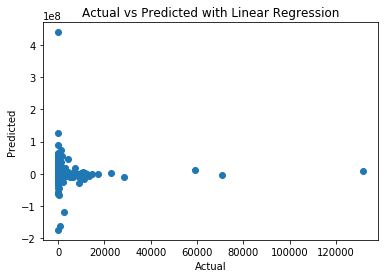

In [28]:
plt.scatter(y_test, cls_dict_pred['Linear Regression'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted with Linear Regression")

Text(0.5,1,'Actual vs Predicted with Ridge CV')

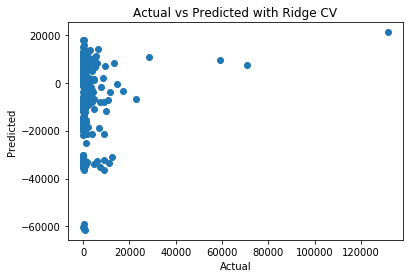

In [29]:
plt.scatter(y_test, cls_dict_pred['Ridge CV'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted with Ridge CV")

Text(0.5,1,'Actual vs Predicted with LinearSVC')

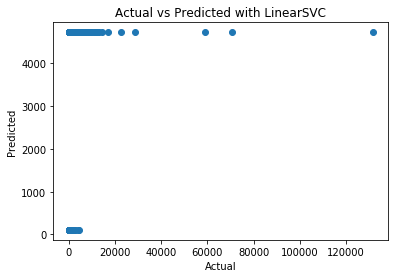

In [31]:
plt.scatter(y_test, cls_dict_pred['LinearSVC'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted with LinearSVC")

In [23]:
clf = RandomForestClassifier(random_state=0)
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
predicted = clf.predict(x_test)

In [25]:
import seaborn as sns
import scipy as sp
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
model_xgb = xgb.XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=596)
model_xgb.fit(x, y)

In [ ]:
y_pred = model_xgb.predict(x_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
print(RMSE)

In [ ]:
x_test.shape

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual retweet")
plt.ylabel("Predicted retweet")
plt.title("retweet vs Predicted rewteet")

In [ ]:
import matplotlib.pyplot as plt
# plot it as in the example at http://scikit-learn.org/
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()